In [1]:
#Import Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

In [2]:
#Read CSV file
reviews = pd.read_csv(r"C:\Users\rohin\OneDrive\Desktop\Capstone 2\consumer-reviews-of-amazon-products\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [3]:
#Check contents of data in the file
reviews.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [4]:
#Total number of reviews which are missing or null
reviews_null = reviews.isnull().sum()
reviews_null[reviews_null>0].sort_values(ascending=False)

reviews.id           4971
reviews.dateAdded    3948
reviews.title          13
dtype: int64

In [5]:
#Extract only fields like Rating, Text and Title of review for analysis
review_data = reviews[['reviews.rating' , 'reviews.text' , 'reviews.title']]
review_data.head()

,reviews.rating,reviews.text,reviews.title
0,3,I thought it would be as big as small paper bu...,Too small
1,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,4,Didnt know how much i'd use a kindle so went f...,Great for the price
3,5,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids


In [6]:
reviews_null =  review_data[review_data["reviews.rating"].isnull()]
reviews_null.head()

,reviews.rating,reviews.text,reviews.title


In [7]:
#Review which are not null or missing. 
reviews_notnull= review_data[review_data["reviews.rating"].notnull()]
reviews_notnull.head()

,reviews.rating,reviews.text,reviews.title
0,3,I thought it would be as big as small paper bu...,Too small
1,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,4,Didnt know how much i'd use a kindle so went f...,Great for the price
3,5,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids


In [8]:
#Get an descriptive information of the reviews
reviews_notnull.describe()

,reviews.rating
count,5000.000000
mean,4.596800
std,0.731804
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
#Differentiate positive and negative reviews based on the rating
print('Total number of reviews: ', len(reviews_notnull))
print('\nTotal number of positive reviews: ', reviews_notnull[reviews_notnull['reviews.rating']>3].count()/len(reviews_notnull)*100)
print('\nTotal number of negative reviews: ', reviews_notnull[reviews_notnull['reviews.rating']<=3].count()/len(reviews_notnull)*100)


Total number of reviews:  5000

Total number of positive reviews:  reviews.rating    93.72
reviews.text      93.72
reviews.title     93.46
dtype: float64

Total number of negative reviews:  reviews.rating    6.28
reviews.text      6.28
reviews.title     6.28
dtype: float64


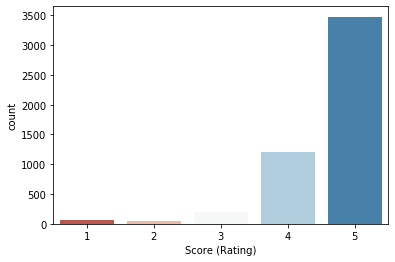

In [10]:
#Plot ratings across the dataset
plt.figure()
sns.countplot(x='reviews.rating', data=reviews_notnull, palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

In [11]:
#Assign sentiment to the rating as positve or negative
copy_df = reviews[['reviews.rating' , 'reviews.text' , 'reviews.title']].copy()

#copy_df["Sentiment"] = copy_df["reviews.rating"].apply(lambda reviews.rating: "positive" if reviews.rating > 3 else \ ("negative" if reviews.rating < 3 else "neutral"))
copy_df["Sentiment"] = np.where(copy_df["reviews.rating"]>=3, 'Positive', 'Negative')

copy_df.head()



,reviews.rating,reviews.text,reviews.title,Sentiment
0,3,I thought it would be as big as small paper bu...,Too small,Positive
1,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Positive
2,4,Didnt know how much i'd use a kindle so went f...,Great for the price,Positive
3,5,I am 100 happy with my purchase. I caught it o...,A Great Buy,Positive
4,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Positive


In [12]:
copy_df.head(10)

,reviews.rating,reviews.text,reviews.title,Sentiment
0,3,I thought it would be as big as small paper bu...,Too small,Positive
1,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Positive
2,4,Didnt know how much i'd use a kindle so went f...,Great for the price,Positive
3,5,I am 100 happy with my purchase. I caught it o...,A Great Buy,Positive
4,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Positive
5,5,This make an excellent ebook reader. Don't exp...,Good ebook,Positive
6,5,"I ordered this for my daughter, as I have the ...",Light Weight - Makes a world of difference whe...,Positive
7,4,I bought my Kindle about 2 months ago and the ...,not good quality,Positive
8,5,"amazon kindle is always the best ebook, upgrad...",best ebook,Positive
9,5,"It's beyond my expectation, and it can even sh...",Great Product,Positive


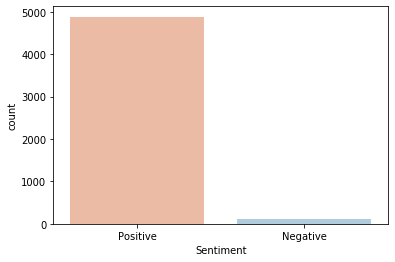

In [13]:
#Get a count of number of positive or negative reviews
sns.countplot(x='Sentiment', order=["Positive", "Negative"], data=copy_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [14]:
copy_df.Sentiment.value_counts()

Positive    4883
Negative     117
Name: Sentiment, dtype: int64

In [15]:
#Importing packages for determing stopwords and tokenizing of words
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
#Removing all words less than 3 charaters from the reviews
dfstopwords = copy_df['reviews.text'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))

In [18]:
dfstopwords

0       thought would small paper turn just like palm....
1              This kindle light easy especially beach!!!
2       Didnt know much kindle went lower end. happy w...
3       happy with purchase. caught sale really good p...
4       Solid entry level Kindle. Great kids. Gifted f...
                              ...                        
4995           This great tablet price. Amazon doing good
4996    This tablet perfect size easy use. Read, play ...
4997    Purchased this son. room upgrade memory allow ...
4998    some thoughts about getting this year old, scr...
4999        this steal, have model well.This more punch..
Name: reviews.text, Length: 5000, dtype: object

In [19]:
#Function to remove stopwords, punctuation and tokenize words to create a wordcloud
def create_Word_Corpus(df):
    words_corpus = ''
    for val in dfstopwords:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        #tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [20]:
#Function to plot a word cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

In [21]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(dfstopwords))

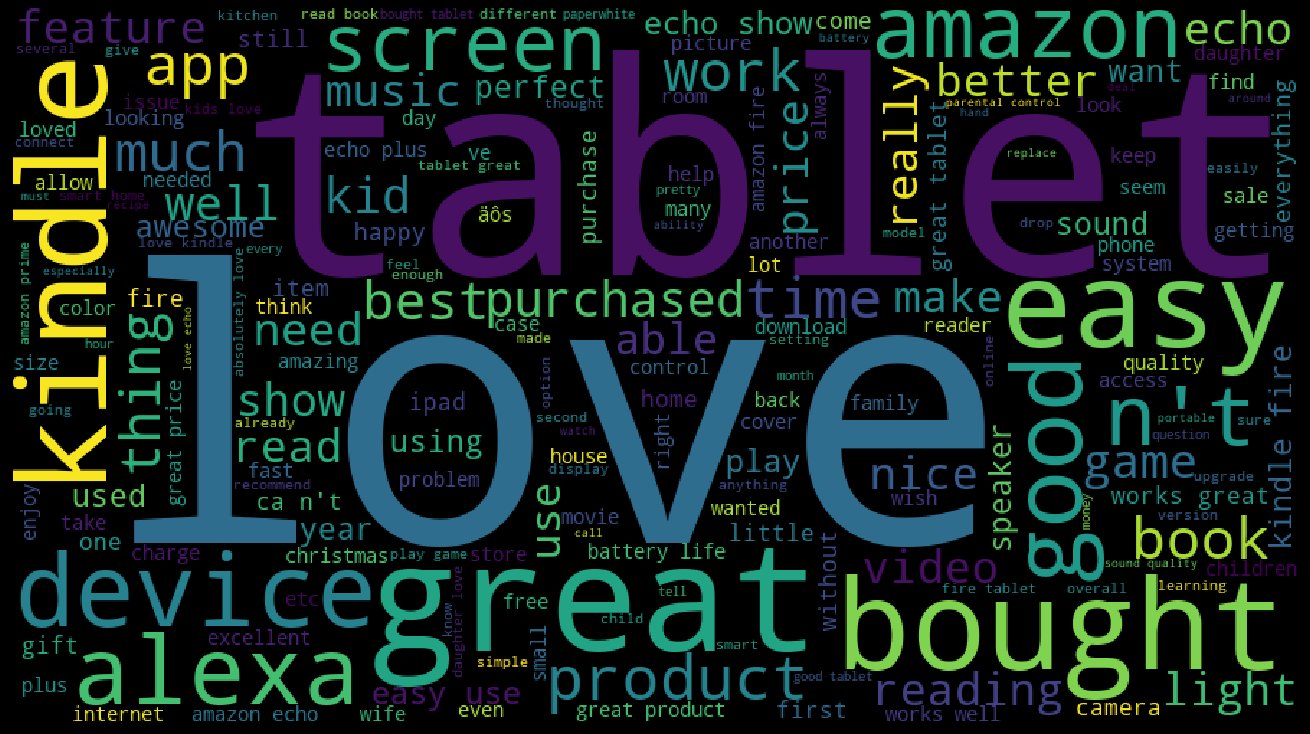

<Figure size 432x288 with 0 Axes>

In [22]:
plot_Cloud(pos_wordcloud)

# JUPYTER INSIGTHS

After analyzing the reviews for different products sold on Amazon we can determine if a review is a positive or negative review using natural langauge processing.

From the data we can see we have a large number of positive reviews. By plotting a word cloud for each of the positive reviews we see some of the words from the above word cloud visual which can determine which words are used most often to determine if it a positive or negative review.

Looking at the above word cloud words like "Love","Good", "Great", "Nice", "Easy" all can be conclusive to say if it is positive review.